## **<h3 style="color:red;">🧠 Project: ECG Heartbeat Classification** 

This project aims to classify heartbeats into five distinct categories using a 1D Convolutional Neural Network (1D CNN). The model is trained on data derived from the MIT-BIH Arrhythmia Dataset, a widely used and clinically relevant resource for ECG (electrocardiogram) signal analysis.

Each sample represents a single heartbeat, preprocessed into a fixed-length vector of 187 values, sampled at 125Hz. The classification task involves detecting and differentiating between five heartbeat types

<div style="background-color:#ffcccc; padding:6px; border-radius:8px;">

### <span style="color:black;">**Dataset Overview**</span>

</div>


This dataset is designed for the **classification of heartbeats from ECG (Electrocardiogram) signals**. It combines samples from two important sources:

- **MIT-BIH Arrhythmia Dataset** – Focused on classifying various arrhythmias.  
- **PTB Diagnostic ECG Database** – Focused on distinguishing between normal and myocardial infarction cases.  

Each sample represents a single heartbeat, preprocessed into a fixed-length signal of **187 values**. These samples are labeled into specific classes that represent different heartbeat types. The dataset is suitable for **training deep learning models for medical signal classification**.

**Heartbeat signal classes:**

| Label | Code | Description                   |
|-------|------|-------------------------------|
| 0     | N    | Normal beat                   |
| 1     | S    | Supraventricular ectopic beat |
| 2     | V    | Ventricular ectopic beat      |
| 3     | F    | Fusion beat                   |
| 4     | Q    | Unknown beat                  |

</div>



#### **Project Structure**

1. **Data Loading and Preprocessing**
2. **Exploratory Data Analysis**
3. **Model Architecture Design**
4. **Training and Validation**
5. **Model Evaluation**
6. **Results Analysis**

<div style="background-color:#ffcccc; padding:6px; border-radius:8px;">

### <span style="color:black;">**Importing Libraries**</span>

</div>


##### In this section, I import all the necessary Python libraries required for:

**``Data manipulation and analysis``** → **NumPy, Pandas**

**``Data visualization``** → **Matplotlib, Seaborn**

**``Machine learning utilities``** → **Scikit-learn modules for splitting data, scaling, and evaluating models**

**``Deep learning model building``** → **TensorFlow Keras for constructing and training a 1D CNN model suitable for time-series ECG data**

In [19]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Before training our model, I need to locate and load the ECG heartbeat datasets.  
This block of code:

1. **Imports necessary libraries** (`pathlib`, `os`, `pandas`) for file handling and data manipulation.
2. **Searches for the dataset CSV files** in two main locations:
   - The current project folder (recursively)
   - The Desktop folder
3. **Uses pattern matching** to find files that match typical names such as `mitbih_train.csv` and `mitbih_test.csv`.
4. **Loads the data into Pandas DataFrames** (`df_train` and `df_test`) if the files are found.
5. Prints the search locations, file paths, and the shapes of the loaded datasets to confirm successful loading.

This ensures that no matter where the dataset is stored (project folder or Desktop), we can find and load it efficiently.

In [33]:
import os
import pandas as pd
import numpy as np

# Check if datasets exist
if not os.path.exists("mitbih_train.csv") or not os.path.exists("ptbdb_train.csv"):
    print("Please download the MIT-BIH and PTB datasets from:")
    print("MIT-BIH: https://www.physionet.org/content/mitdb/1.0.0/")
    print("PTB DB: https://www.physionet.org/content/ptbdb/1.0.0/")


Please download the MIT-BIH and PTB datasets from:
MIT-BIH: https://www.physionet.org/content/mitdb/1.0.0/
PTB DB: https://www.physionet.org/content/ptbdb/1.0.0/


In [5]:
from pathlib import Path
import os
import pandas as pd

# Search the current project folder (recursively) and Desktop for likely dataset filenames
cwd = Path.cwd()
home = Path.home()
desktop = home / "Desktop"

patterns = [
    "mitbih_train*.csv",
    "mitbih_test*.csv",
    "*mitbih*train*.csv",
    "*mitbih*test*.csv",
    "*train*.csv",
    "*test*.csv"
]

found_train = None
found_test = None

# helper to search a directory recursively for the first matching pattern
def find_first_match(root: Path, patterns):
    for pat in patterns:
        for p in root.rglob(pat):
            if p.is_file():
                return p
    return None

# 1) search cwd (project folder) recursively
found_train = find_first_match(cwd, ["mitbih_train.csv", "mitbih_train*.csv", "*train*.csv"]) or find_first_match(cwd, patterns)
found_test = find_first_match(cwd, ["mitbih_test.csv", "mitbih_test*.csv", "*test*.csv"]) or find_first_match(cwd, patterns)

# 2) if not found, search Desktop
if not found_train:
    found_train = find_first_match(desktop, ["mitbih_train.csv", "mitbih_train*.csv", "*train*.csv"]) or find_first_match(desktop, patterns)
if not found_test:
    found_test = find_first_match(desktop, ["mitbih_test.csv", "mitbih_test*.csv", "*test*.csv"]) or find_first_match(desktop, patterns)

print("Search locations and results:")
print(" - Project folder:", cwd)
print(" - Desktop:", desktop)
print()
print("Found training file:", found_train)
print("Found testing file:", found_test)

try:
    if found_train and found_test:
        df_train = pd.read_csv(found_train, header=None)
        df_test = pd.read_csv(found_test, header=None)
        print("Data loaded successfully!")
        print(f"Training data shape: {df_train.shape}")
        print(f"Testing data shape: {df_test.shape}")
    else:
        print("Error: Could not find both training and testing CSV files.")
        print("If files are present with different names, please tell me the filenames or move/rename them to follow patterns like 'mitbih_train.csv' and 'mitbih_test.csv'.")
except Exception as e:
    print(f"Error loading data: {e}")


Search locations and results:
 - Project folder: c:\Users\USER\Desktop\Heartbeats_Project
 - Desktop: C:\Users\USER\Desktop

Found training file: C:\Users\USER\Desktop\Data Science Folder\archive (1)\mitbih_train.csv
Found testing file: C:\Users\USER\Desktop\Data Science Folder\archive (1)\mitbih_test.csv
Data loaded successfully!
Training data shape: (87554, 188)
Testing data shape: (21892, 188)
Data loaded successfully!
Training data shape: (87554, 188)
Testing data shape: (21892, 188)


<div style="background-color:#ffcccc; padding:6px; border-radius:8px;">

### <span style="color:black;">**Exploratory Data Analysis**</span>

</div>


Before preprocessing and modeling, I perform **Exploratory Data Analysis (EDA)** to understand the dataset and its characteristics. In this step, I will:

1. **Inspect the first few rows** of the training and testing datasets to verify that the data loaded correctly.
2. **Check dataset information** (`info()`) to see data types and memory usage.
3. **Detect missing values** and duplicated rows to ensure data quality.
4. **Analyze the distribution of heartbeat classes** in the training set.
5. **Visualize class distribution** using a bar plot to understand the balance of different heartbeat types.

These steps help identify potential issues, understand the dataset structure, and prepare for preprocessing and modeling.

In [ ]:
# Inspect Data
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Dataset Information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [ ]:
# Check for Missing Values
df_train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [ ]:
# Check for Duplicates
df_train.duplicated().sum()

0

In [ ]:
# Class Distribution
label_counts = df_train.iloc[:,187].value_counts().sort_index()

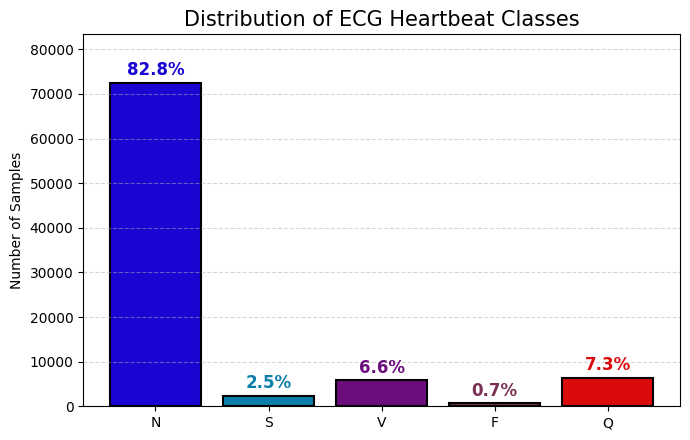

In [ ]:
# Visualize class distribution
from matplotlib import pyplot as plt

labels = ['N', 'S','V','F','Q']
counts = [label_counts.get(i, 0) for i in range(5)]
total = sum(counts)
percentages = [count / total * 100 for count in counts]

colors = ["#1904D2", "#097EA8", "#6C0D7D", "#793053", "#DC0B0B"]


plt.figure(figsize=(7, 4.5))
bars = plt.bar(labels, counts, color=colors, edgecolor='black', linewidth=1.5)

for bar, pct, color in zip(bars, percentages, colors):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + total * 0.01, 
             f'{pct:.1f}%', ha='center', va='bottom', color=color, 
             fontsize=12, fontweight='bold')

plt.title('Distribution of ECG Heartbeat Classes', fontsize=15)
plt.ylabel('Number of Samples')
plt.ylim(0, max(counts) * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The plot shows that **Normal beats (N)** dominate the dataset, while some classes like **Fusion beats (F)** are much less frequent. This **class imbalance** may need to be addressed during model training.

____
____

### **Average ECG Waveform per Class**

To better understand the characteristics of each heartbeat type, we can compute and visualize the **average ECG waveform** for each class:

1. **Separate features and labels:**  
   - `df_signals` contains the **187 signal values** per heartbeat.  
   - `df_labels` contains the **class labels**.  
2. **Group by class and compute the mean** waveform for each heartbeat type.  
3. **Plot the average waveform** for each class in separate subplots:
   - X-axis represents **time points** (ms).  
   - Y-axis represents **signal amplitude (mV)**.  
4. This visualization helps identify differences between heartbeat types, which is crucial for feature learning and classification.

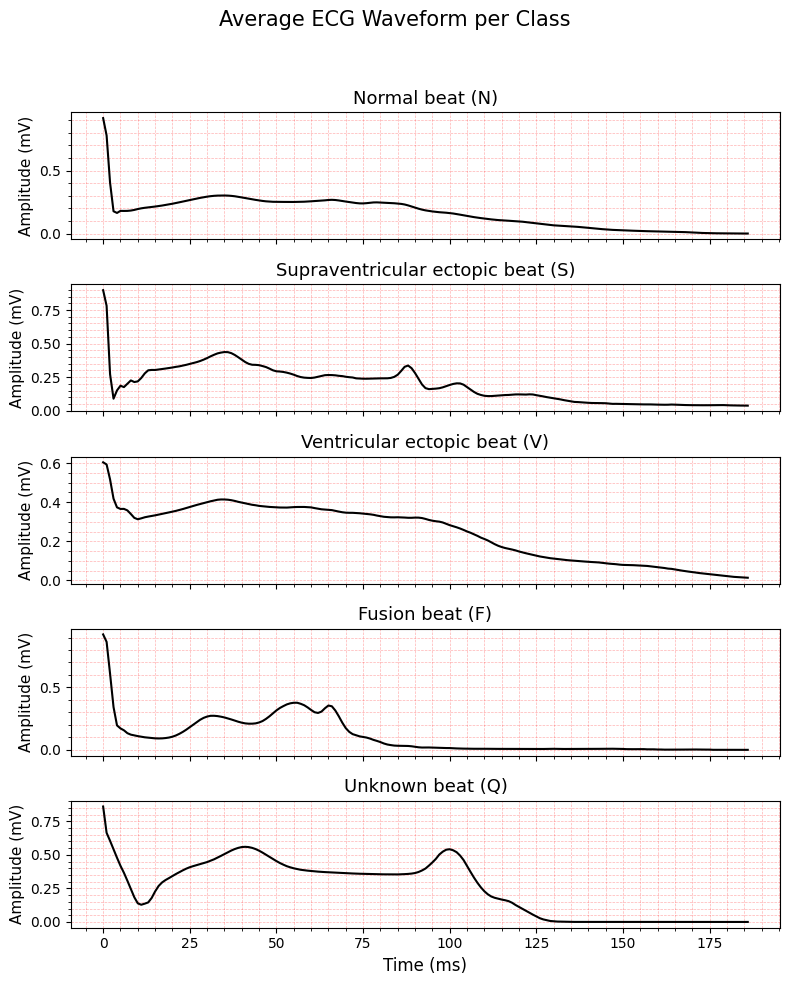

In [32]:
signal_cols = df_train.columns[:187]  
df_signals = df_train[signal_cols]
df_labels = df_train[187]

grouped_classes = df_signals.groupby(df_labels).mean()

conditions = {
    0: "Normal beat (N)",
    1: "Supraventricular ectopic beat (S)",
    2: "Ventricular ectopic beat (V)",
    3: "Fusion beat (F)",
    4: "Unknown beat (Q)"
}

fig, axes = plt.subplots(5, 1, figsize=(8, 10), sharex=True)

for i in range(5):
    signal = grouped_classes.loc[i].values
    ax = axes[i]
    ax.plot(signal, color='black', linewidth=1.5)
    ax.set_title(conditions[i], fontsize=13)
    ax.set_ylabel("Amplitude (mV)", fontsize=11)
    ax.grid(which='both', linestyle='--', linewidth=0.5, color='red', alpha=0.3)
    ax.minorticks_on()

axes[-1].set_xlabel("Time (ms)", fontsize=12)

fig.suptitle("Average ECG Waveform per Class", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

From the plots, we can see that **different heartbeat types have distinct waveform shapes**, which the model can learn to distinguish. For example, **Ventricular ectopic beats (V)** show a pronounced deviation from the normal rhythm, while **Fusion beats (F)** have a more blended shape.

<div style="background-color:#ffcccc; padding:6px; border-radius:8px;">

### <span style="color:black;">**Data Preprocessing and Preparation**</span>

</div>

Before training our deep learning model, we perform several preprocessing steps on the ECG dataset:

In [ ]:
# Split features and labels
X = df_train.iloc[:, :-1].values         
y = df_train.iloc[:, -1].astype(int).values  
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].astype(int).values

In [ ]:
# Split training set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape for 1D CNN input
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_valid = X_valid.reshape(-1, X_valid.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

In [ ]:
# Compute class weights to handle imbalance
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 0.2416234023837039, 1: 7.878852643419573, 2: 3.0256155507559397, 3: 27.307212475633527, 4: 2.722759961127308}


The printed `class_weights` dictionary shows higher weights for underrepresented classes, ensuring the model learns to predict them effectively during training.

#### **Model Development**

<div style="background-color:#ffcccc; padding:6px; border-radius:8px;">

### <span style="color:black;">**Model Architecture**</span>

</div>

We build a **1D Convolutional Neural Network (CNN)** to classify ECG heartbeats. Key aspects of this architecture:

- **Conv1D layers** extract features from signals, increasing filters (32 → 512).  
- **BatchNorm + LeakyReLU** stabilize training and add non-linearity.  
- **MaxPooling + Dropout** reduce dimensionality and prevent overfitting.  
- **Dense layers** learn complex class-specific representations after flattening.  
- **Output:** `Dense(5, softmax)` predicts the heartbeat class.  
- **Callbacks:** `EarlyStopping` and `ReduceLROnPlateau` optimize training.  
- **Compilation:** `Adam` optimizer, `sparse_categorical_crossentropy` loss, and `accuracy` metric.

This setup efficiently learns ECG patterns while addressing class imbalance and overfitting.

In [25]:
model = Sequential([
    Conv1D(32, 5, padding='same', input_shape=(187,1)),
    BatchNormalization(), LeakyReLU(0.3),
    MaxPooling1D(2), Dropout(0.3),

    Conv1D(64, 5, padding='same'),
    BatchNormalization(), LeakyReLU(0.3),
    MaxPooling1D(2), Dropout(0.3),

    Conv1D(128, 5, padding='same'),
    BatchNormalization(), LeakyReLU(0.3),
    MaxPooling1D(2), Dropout(0.3),

    Conv1D(256, 5, padding='same'),
    BatchNormalization(), LeakyReLU(0.3),
    MaxPooling1D(2), Dropout(0.3),
    
    Conv1D(512, 5, padding='same'),
    BatchNormalization(), LeakyReLU(0.3),
    MaxPooling1D(2), Dropout(0.4),

    Conv1D(512, 5, padding='same'),
    BatchNormalization(), LeakyReLU(0.3),
    MaxPooling1D(2), Dropout(0.4),

    Flatten(),
    
    Dense(1024), BatchNormalization(), LeakyReLU(0.3), Dropout(0.5),
    Dense(512), BatchNormalization(), LeakyReLU(0.3), Dropout(0.5),
    Dense(256), BatchNormalization(), LeakyReLU(0.3), Dropout(0.5),
    Dense(128), BatchNormalization(), LeakyReLU(0.3), Dropout(0.5),
    Dense(64), BatchNormalization(), LeakyReLU(0.3), Dropout(0.5),
    Dense(32), BatchNormalization(), LeakyReLU(0.3), Dropout(0.5),
    Dense(5, activation='softmax')
])

early_stop = EarlyStopping(
    monitor='val_loss',     
    patience=20,             
    restore_best_weights=True, 
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',    
    factor=0.2,             
    patience=3,             
)

model.compile(
    optimizer=Adam(1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 187, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 187, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 187, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 93, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 93, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 93, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 93, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 93, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 46, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 46, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 46, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 46, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 46, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 23, 256)        │       164,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 23, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 23, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 11, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 11, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 11, 512)        │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 512)        │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,945,989 (15.05 MB)

 Trainable params: 3,938,949 (15.03 MB)

 Non-trainable params: 7,040 (27.50 KB)

In [28]:
history = model.fit(
    X_train, y_train,
    batch_size=128,
    validation_data=(X_valid, y_valid),
    epochs=100,
    callbacks=[early_stop, reduce_lr],
    class_weight=class_weights,
    verbose=1
)

Epoch 1/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 108s 196ms/step - accuracy: 0.8281 - loss: 0.4169 - val_accuracy: 0.7924 - val_loss: 0.5330 - learning_rate: 0.0010
Epoch 2/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 123s 225ms/step - accuracy: 0.8317 - loss: 0.3888 - val_accuracy: 0.6106 - val_loss: 0.9427 - learning_rate: 0.0010
Epoch 3/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 113s 206ms/step - accuracy: 0.8403 - loss: 0.3680 - val_accuracy: 0.8739 - val_loss: 0.3684 - learning_rate: 0.0010
Epoch 4/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 113s 206ms/step - accuracy: 0.8480 - loss: 0.3702 - val_accuracy: 0.8467 - val_loss: 0.4611 - learning_rate: 0.0010
Epoch 5/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 168s 306ms/step - accuracy: 0.8549 - loss: 0.3527 - val_accuracy: 0.8570 - val_loss: 0.4043 - learning_rate: 0.0010
Epoch 6/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 162s 295ms/step - accuracy: 0.8556 - loss: 0.3404 - val_accuracy: 0.8484 - val_loss: 0.4130 - learning_rate: 0.0010
Epoch 7/100
548/548 ━━━━━━━━━━━━━━━━━━━━ 143s 261ms/step -

#### **Training History**

After training the model, we can visualize how **loss** and **accuracy** changed over epochs:

- The **left plot** shows training vs. validation loss.  
- The **right plot** shows training vs. validation accuracy.  
- These plots help identify **overfitting, underfitting, or convergence issues**.

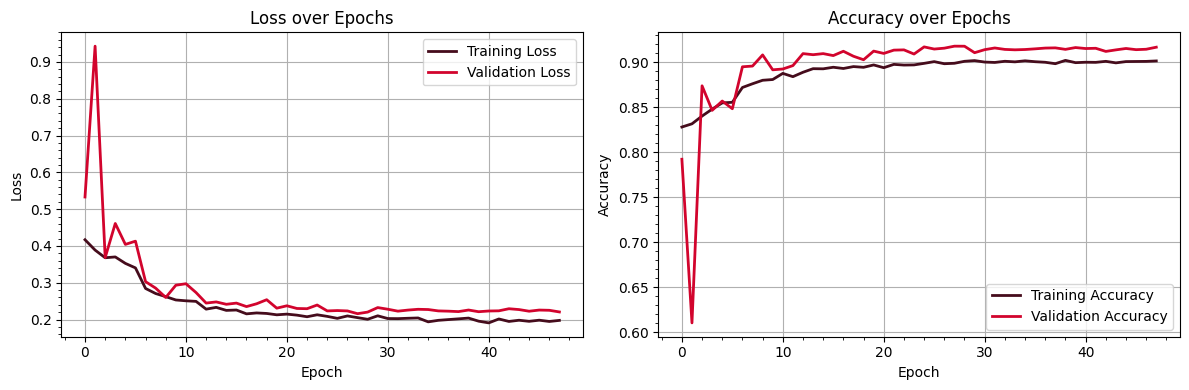

In [29]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='#450C1C', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='#D2042D', linewidth=2)
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.minorticks_on()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='#450C1C', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#D2042D', linewidth=2)
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.minorticks_on()

plt.tight_layout()
plt.show()

Ideally, validation loss decreases alongside training loss, and validation accuracy closely follows training accuracy, indicating good generalization.

<div style="background-color:#ffcccc; padding:6px; border-radius:8px;">

### <span style="color:black;">**Model Evaluation**</span>

</div>

After training, we evaluate the model on the **test set** to measure its performance:

1. **Predictions:**  
   - `y_pred_probs` gives the predicted probabilities.  
   - `y_pred` contains the predicted classes.  

2. **Metrics:**  
   - **Accuracy, Precision, Recall, F1 Score** provide a quantitative measure of performance.  
   - `classification_report` shows per-class precision, recall, and F1.  

3. **Confusion Matrix:**  
   - Shows the **counts of true vs. predicted classes**.  
   - Normalized confusion matrix helps visualize **proportion of correct predictions** per class.  

These metrics and visualizations help assess how well the model distinguishes different heartbeat types.

685/685 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step
Accuracy : 0.9186
Precision: 0.9618
Recall   : 0.9186
F1 Score : 0.9338
Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     18118
           1       0.33      0.89      0.48       556
           2       0.86      0.95      0.90      1448
           3       0.28      0.93      0.43       162
           4       0.96      0.99      0.98      1608

    accuracy                           0.92     21892
   macro avg       0.68      0.93      0.75     21892
weighted avg       0.96      0.92      0.93     21892



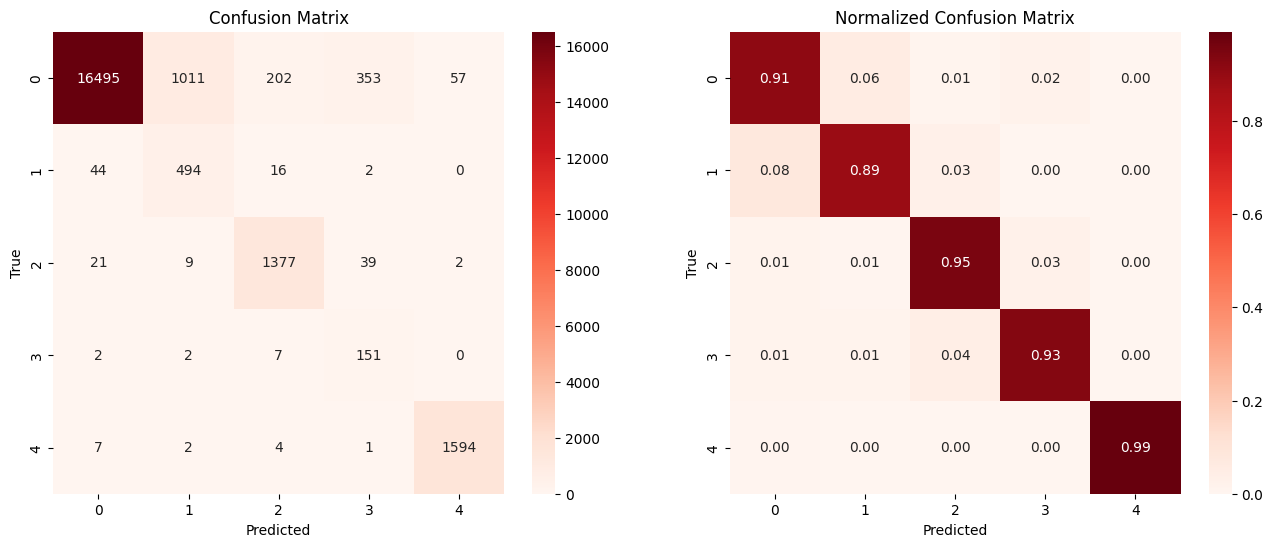

In [30]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

print("Classification Report:\n")
print(classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4], ax=axs[0])
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("True")
axs[0].set_title("Confusion Matrix")

sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Reds", xticklabels=[0,1,2,3,4], yticklabels=[0,1,2,3,4], ax=axs[1])
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("True")
axs[1].set_title("Normalized Confusion Matrix")

plt.show()

From the confusion matrices, we can see which classes are well-predicted and which may be confused, helping guide further improvements or data balancing if needed.